In [1]:
# -*- coding: utf-8 -*-
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np
import codecs

#==============================================================================
# Chart variables
#==============================================================================
titlesize = 16
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare
# exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
figsize = (12,9)
# figsize = (12,3)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]

# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

# =============================================================================
# Location String	Location Code
# 'best'	0
# 'upper right'	1
# 'upper left'	2
# 'lower left'	3
# 'lower right'	4
# 'right'	5
# 'center left'	6
# 'center right'	7
# 'lower center'	8
# 'upper center'	9
# 'center'	10
# =============================================================================

# =============================================================================
# These are the "Tableau 20" colors as RGB.
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
# =============================================================================
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

#==============================================================================
path =    '../../../resources/test/'
outpath = '../../../resources/test/charts/'

filename = "test.csv"
simMember, simMeta, synMember, synMeta, nsize, covThr, distThr = 0.8, 0.4, 1, 5, 3, 0.7, 3

def marker(filename):
    # if 'EXT' in filename:
    return 6, 'o', '-', 'C-BI', 'black'
    # else:
    #     c = 'gray'
    #     m = "^"
    #     if th == 0.05:
    #         c = 'silver'
    #         m = "v"
    #     elif th == 0.25:
    #         c = 'dimgray'
    #         m = "<"
    #     return 6, m, '--', 'A-BI$_{' + str(theta) + '}$', c

### Effectiveness - stats

In [2]:
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    msize, m, ls, l, c = marker(filename)    
    data = pd.read_csv(f, sep=';')
    ddata = data
    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["simMeta"] == simMeta]
    ddata = ddata[ddata["synMeta"] == synMeta]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == distThr]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["countAnnotations"] >= 0]
    ddata = ddata[ddata["disambiguationStep"] == 0]
    ddata = ddata[ddata["k"] == 1]
    ddata = ddata[ddata["run"] == 0]
ddata = ddata.sort_values(['id', 'disambiguationStep'], ascending=[True, True])
ddata[["id", "lemmatization_sentence", "isFullyParsed", "sentence_parsed", "k", "disambiguationStep", "similarity"]]

id                             lemmatization_sentence  isFullyParsed  \
1448    1       sum unit sales by media type for USA country           True   
176     2                              store sales by gender           True   
1288    3      sum unit sales by media type for Sheri Nowmer           True   
2148    4  sum unit sales by country by month by province...           True   
2108    5  store sales by month in 2010 for Atomic Mints ...           True   
...   ...                                                ...            ...   
988   343            sum unit sales for country Sheri Nowmer           True   
516   344                       store sales for Sheri Nowmer           True   
136   345                                store sales for USA           True   
1988  346  store sales for USA and state province Sheri N...           True   
1668  347     store sales for USA and Sheri Nowmere province           True   

                                        sentence_parsed  k  \
1448  [{"Q":[{"MC":[{"OP":"sum(0,0)","mde":"sum","sy...  1   
176   [{"Q":[{"MC":[{"MEA":"store sales(0,1)","mde":...  1   
1288  [{"Q":[{"MC":[{"OP":"sum(0,0)","mde":"sum","sy...  1   
2148  [{"Q":[{"MC":[{"OP":"sum(0,0)","mde":"sum","sy...  1   
2108  [{"Q":[{"MC":[{"MEA":"store sales(0,1)","mde":...  1   
...                                                 ... ..   
988   [{"Q":[{"MC":[{"OP":"sum(0,0)","mde":"sum","sy...  1   
516   [{"Q":[{"MC":[{"MEA":"store sales(0,1)","mde":...  1   
136   [{"Q":[{"MC":[{"MEA":"store sales(0,1)","mde":...  1   
1988  [{"Q":[{"MC":[{"MEA":"store sales(0,1)","mde":...  1   
1668  [{"Q":[{"MC":[{"MEA":"store sales(0,1)","mde":...  1   

      disambiguationStep  similarity  
1448                   0    1.000000  
176                    0    0.857143  
1288                   0    1.000000  
2148                   0    1.000000  
2108                   0    0.473684  
...                  ...         ...  
988                    0    0.454545  
516                    0    0.875000  
136                    0    0.625000  
1988                   0    0.642857  
1668                   0    0.642857  

[110 rows x 7 columns]

Aggregate sentences by number of annotations

In [3]:
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    msize, m, ls, l, c = marker(filename)    
    data = pd.read_csv(f, sep=';')
    ddata = data
    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["simMeta"] == simMeta]
    ddata = ddata[ddata["synMeta"] == synMeta]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == distThr]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["countAnnotations"] >= 0]
    ddata = ddata[ddata["disambiguationStep"] == 0]
    ddata = ddata[ddata["k"] == 1]
    ddata = ddata[ddata["run"] == 0]
ddata = ddata[["countAnnotations", "id"]]
d = ddata.groupby(["countAnnotations"]).apply(lambda x: len(x["id"].unique()))
# for key, item in d:
#     print("key " + str(key), "\n")
#     print(d.get_group(key), "\n\n")
d

countAnnotations
0    58
1    38
2    12
3     2
dtype: int64

Aggregate sentences by fully parsed flag

In [4]:
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    msize, m, ls, l, c = marker(filename)    
    data = pd.read_csv(f, sep=';')
    ddata = data
    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["simMeta"] == simMeta]
    ddata = ddata[ddata["synMeta"] == synMeta]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == distThr]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["disambiguationStep"] == 0]
    ddata = ddata[ddata["k"] == 1]
    ddata = ddata[ddata["run"] == 0]
ddata = ddata[["isFullyParsed", "id"]]
d = ddata.groupby(["isFullyParsed"]).apply(lambda x: len(x["id"].unique()))
d

isFullyParsed
False      2
True     108
dtype: int64

### Effectiveness - top-k similarity disambiguation

Fixed:
    - alpha = 0.4
    - N = 5
    - k = 1

[[0, 0.8931764259445092], [1, 0.9275628377626687], [2, 0.933371994831325], [3, 0.9359693974287275]]


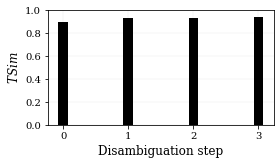

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.4))
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    msize, m, ls, l, c = marker(filename)    
    data = pd.read_csv(f, sep=';')
    ddata = data
    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["simMeta"] == simMeta]
    ddata = ddata[ddata["synMeta"] == synMeta]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == distThr]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["k"] == 1]
    ddata = ddata[ddata["run"] == 0]
    res = []
    ss = sorted([x for x in ddata["disambiguationStep"].unique()])
    width=0.15
    for s in ss:
        dddata = ddata
        dddata = dddata[dddata["disambiguationStep"] == s]
        d = dddata.groupby(["id"])
        res.append([s, d['similarity'].max().mean()])
    ind = np.arange(len(res))   # the x locations for the groups
    ax.bar(ind, [x[1] for x in res], width=width, color=c, bottom=0)
    ax.set_xticks(ind)
    ax.set_xticklabels([x[0] for x in res])
    ax.set_ylabel("$TSim$", fontsize=axessize)
    print(res)
ax.grid(color="lightgray", linestyle='-', linewidth=0.2)
ax.set_axisbelow(True)
ax.set_xlabel("Disambiguation step", fontsize=axessize)
ax.set_ylim([0, 1])
# ax.legend(handletextpad=0, columnspacing = 0.4, labelspacing=0.2, frameon=False, fontsize=legendsize, ncol=3, bbox_to_anchor=(0.5, 1.3), loc='upper center')
fig.tight_layout()
fig.savefig(outpath + 'disambiguation.pdf')

### Effectiveness - top-k similarity N (no disambiguation)

Fixed:
    - alpha = 0.4

$N$: 1 sim [0.88075929761829, 0.8898708678662238, 0.900011257779341, 0.9015370047596335, 0.9015370047596335]
$N$: 3 sim [0.8931764259445092, 0.9049739466056663, 0.9144780788370711, 0.9144780788370711, 0.9148044191634115]
$N$: 5 sim [0.8931764259445092, 0.9049739466056663, 0.9144780788370711, 0.9144780788370711, 0.9144780788370711]


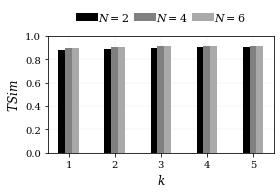

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    msize, m, ls, l, c = marker(filename)    
    data = pd.read_csv(f, sep=';')
    ddata = data
    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["simMeta"] == simMeta]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["synMeta"] % 2 == 1]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == distThr]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["disambiguationStep"] == 0]
    ddata = ddata[ddata["run"] == 0]
    ks = [x for x in ddata["k"].unique()]
    ks.sort()
    res = []
    width = 0         # the width of the bars
    incwidth = 0.15
    ind = 0
    ss = [x for x in ddata["synMeta"].unique()]
    ss.sort()
    for s in ss:
        res = []
        for k in ks:
            dddata = ddata
            dddata = dddata[dddata["synMeta"] == s]
            dddata = dddata[dddata["k"] <= k]
            d = dddata.groupby(["id"])
            res.append([k, d['similarity'].max().mean()])
        if s == 3:
            m = "s"
            ls = "--"
            c = 'grey'
        elif s == 5:
            m = "x"
            ls = "-."
            c = 'darkgrey'
        else: 
            m = "o"
            ls = "-"
            c = 'black'
        # ax.plot([x[0] for x in res], [x[1] for x in res], label = l + "$_ " + str((s + 1)) + "$", marker = m, markersize = msize, linestyle = ls, fillstyle='none', linewidth=0.8, color=c) # label="$q_{div}$",
        if len(res) == 0:
            ind = np.array([0])
        else:
            ind = np.arange(len(res))   # the x locations for the groups
        ax.bar(ind + width, [x[1] for x in res], width=incwidth, color=c, bottom=0, label="$N=" + str((s + 1)) + "$")
        print("$N$: " + str(s) + " sim " + str([x[1] for x in res]))
        width = width + incwidth
    ax.set_xticks(ind + incwidth)
    ax.set_xticklabels([x[0] for x in res])
    ax.set_ylabel("$TSim$", fontsize=axessize)
ax.grid(color="lightgray", linestyle='-', linewidth=0.2)
ax.set_axisbelow(True)
ax.set_xlabel("$k$", fontsize=axessize)
ax.set_ylim([0, 1])
ax.legend(handletextpad=0, columnspacing = 0.4, labelspacing=0.2, frameon=False, fontsize=legendsize, ncol=3, bbox_to_anchor=(0.5, 1.3), loc='upper center')
fig.tight_layout()
fig.savefig(outpath + 'N.pdf')

### Effectiveness - top-k similarity \alpha (no disambiguation)

Fixed:
    - N = 5

$\alpha$: 0.6 sim [0.8284637648682117, 0.8442663713526364, 0.8540804209394132, 0.8549068672204049, 0.8554790223380145]
$\alpha$: 0.5 sim [0.8744042889905541, 0.8878547022136946, 0.896858728490448, 0.8983844754707405, 0.8995208391071042]
$\alpha$: 0.4 sim [0.8931764259445092, 0.9049739466056663, 0.9144780788370711, 0.9144780788370711, 0.9144780788370711]


e:\dropbox\workspace\conversationalbi-github\cbi\src\main\python\venv\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


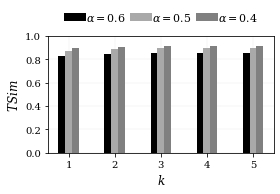

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    msize, m, ls, l, c = marker(filename)    
    data = pd.read_csv(f, sep=';')
    ddata = data
    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["synMeta"] == synMeta]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == distThr]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["disambiguationStep"] == 0]
    ddata = ddata[ddata["run"] == 0]
    ks = [x for x in ddata["k"].unique()]
    ks.sort()
    res = []
    width = 0         # the width of the bars
    incwidth = 0.15
    ind = 0
    ss = sorted([x for x in ddata["simMeta"].unique()], reverse=True)
    for s in ss:
        res = []
        for k in ks:
            dddata = ddata
            dddata = dddata[dddata["simMeta"] == s]
            dddata = dddata[dddata["k"] <= k]
            d = dddata.groupby(["id"])
            res.append([k, d['similarity'].max().mean()])
        if s == 0.4:
            m = "s"
            ls = "--"
            c = 'grey'
        elif s == 0.5:
            m = "x"
            ls = "-."
            c = 'darkgrey'
        else: 
            m = "o"
            ls = "-"
            c = 'black'
        # ax.plot([x[0] for x in res], [x[1] for x in res], label = l + "$_ " + str((s + 1)) + "$", marker = m, markersize = msize, linestyle = ls, fillstyle='none', linewidth=0.8, color=c) # label="$q_{div}$",
        if len(res) == 0:
            ind = np.array([0])
        else:
            ind = np.arange(len(res))   # the x locations for the groups
        ax.bar(ind + width, [x[1] for x in res], width=incwidth, color=c, bottom=0, label="$\\alpha=" + str(s) + "$")
        width = width + incwidth
        print("$\\alpha$: " + str(s) + " sim " + str([x[1] for x in res]))
    ax.set_xticks(ind + incwidth)
    ax.set_xticklabels([x[0] for x in res])
    ax.set_ylabel("$TSim$", fontsize=axessize)
ax.grid(color="lightgray", linestyle='-', linewidth=0.2)
ax.set_axisbelow(True)
ax.set_xlabel("$k$", fontsize=axessize)
ax.set_ylim([0, 1])
ax.legend(handletextpad=0, columnspacing = 0.4, labelspacing=0.2, frameon=False, fontsize=legendsize, ncol=3, bbox_to_anchor=(0.5, 1.3), loc='upper center')
fig.tight_layout()
fig.savefig(outpath + 'alpha.pdf')
fig.show()


### Efficiency - pruning

ngrams_count
1       6.125000
3      24.643564
5    1204.853846
7    2832.500000
Name: sentence_pruned, dtype: float64
ngrams_count
1        6.250000
3       59.267327
5     2653.084615
7    12935.111111
Name: sentence_count_pruned, dtype: float64


e:\dropbox\workspace\conversationalbi-github\cbi\src\main\python\venv\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


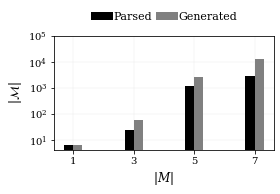

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    msize, m, ls, l, c = marker(filename)    
    data = pd.read_csv(f, sep=';')
    ddata = data
    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["simMeta"] == simMeta]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["synMeta"] == synMeta]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == distThr]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["ngrams_count"] % 2 == 1]
    ddata = ddata[ddata["disambiguationStep"] == 0]
    d = ddata.groupby(["ngrams_count"])
    k = list(d.groups.keys())
    ax.set_ylabel("$|\\mathcal{M}|$", fontsize=axessize)
    # ax.plot(k, d['sentence_count'].mean() / 1000, marker = "x", markersize = msize, linestyle = "--", fillstyle='none', linewidth=0.8, color=c, label="No pruning") # ",
    # ax.plot(k, d['sentence_count_pruned'].mean() / 1000, marker = "s", markersize = msize, linestyle = "-.", fillstyle='none', linewidth=0.8, color=c, label="Distinct mappings") # label="$q_{div}$",
    # ax.plot(k, d['sentence_pruned'].mean() / 1000, marker = m, markersize = msize, linestyle = ls, fillstyle='none', linewidth=0.8, color=c, label="Computed mappings") # label="$q_{div}$",
    # ax.set_xticks(k)
    ind = np.arange(len(k))    # the x locations for the groups
    width = 0.15         # the width of the bars
    ax.bar(ind, d['sentence_pruned'].mean(), width=width, color='black', bottom=0, label="Parsed") # label="$q_{div}$",
    print(d['sentence_pruned'].mean())
    ax.bar(ind + width, d['sentence_count_pruned'].mean(), width=width, color='grey', bottom=0, label="Generated") # label="$q_{div}$",
    print(d['sentence_count_pruned'].mean())
    # ax.bar(ind + width * 2, d['sentence_count'].mean(), width=width, color='darkgrey', bottom=0, label="All") # ",
    # print(d['sentence_count'].mean())
    ax.set_xticks(ind + width * 0.5)
    ax.set_xticklabels(k)
ax.grid(color="lightgray", linestyle='-', linewidth=0.2)
ax.set_axisbelow(True)
ax.set_xlabel("$|M|$", fontsize=axessize)
ax.set_yscale('log')
ax.set_yticks([10, 100, 1000, 10000, 100000])
ax.legend(handletextpad=0, columnspacing = 0.4,  labelspacing=0.2, frameon=False, fontsize=legendsize, ncol=3, bbox_to_anchor=(0.5, 1.3), loc='upper center')
fig.tight_layout()
fig.savefig(outpath + 'pruning.pdf')
fig.show()

### Efficiency - Time (s)

e:\dropbox\workspace\conversationalbi-github\cbi\src\main\python\venv\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


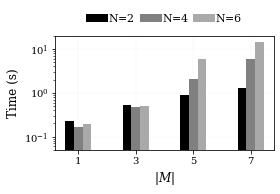

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
with codecs.open(path + filename, 'r', encoding='utf-8') as f:
    msize, m, ls, l, c = marker(filename)    
    data = pd.read_csv(f, sep=';')
    ddata = data

    ddata = ddata[ddata["simMember"] == simMember]
    ddata = ddata[ddata["simMeta"] == simMeta]
    ddata = ddata[ddata["synMember"] == synMember]
    ddata = ddata[ddata["synMeta"] % 2 == 1]
    ddata = ddata[ddata["%missing"] == covThr]
    ddata = ddata[ddata["maxDistance"] == distThr]
    ddata = ddata[ddata["ngramSize"] == nsize]
    ddata = ddata[ddata["ngrams_count"] % 2 == 1]
    ddata = ddata[ddata["disambiguationStep"] == 0]
    ax.set_ylabel("Time (s)", fontsize=axessize)
    # ax.plot(k, (d['lemmatization_time'].mean() + d['match_time'].mean() + d['sentence_time'].mean()) / 1000, marker = m, markersize = msize, linestyle = ls, fillstyle='none', linewidth=0.8, color=c, label=l) # ",
    # ax.set_xticks(k)
    res = []
    width = 0         # the width of the bars
    incwidth = 0.15
    ss = [x for x in ddata["synMeta"].unique()]
    ss.sort()
    for s in ss:
        dddata = ddata
        dddata = dddata[dddata["synMeta"] == s]
        d = dddata.groupby(["ngrams_count"])
        k = list(d.groups.keys())
        if s == 3:
            m = "s"
            ls = "--"
            c = 'grey'
        elif s == 5:
            m = "x"
            ls = "-."
            c = 'darkgrey'
        else: 
            m = "o"
            ls = "-"
            c = 'black'
        # ax.plot([x[0] for x in res], [x[1] for x in res], label = l + "$_ " + str((s + 1)) + "$", marker = m, markersize = msize, linestyle = ls, fillstyle='none', linewidth=0.8, color=c) # label="$q_{div}$",
        ind = np.arange(len(k))   # the x locations for the groups
        ax.bar(ind + width, d['total_time'].mean() / 1000, width=incwidth, bottom=0, color=c, label="N=$" + str((s + 1)) + "$") # ",
        width = width + incwidth
    ax.set_xticks(ind + incwidth)
    ax.set_xticklabels(k)
ax.grid(color="lightgray", linestyle='-', linewidth=0.1)
ax.set_axisbelow(True)
ax.set_xlabel("$|M|$", fontsize=axessize)
ax.set_yscale('log')
ax.set_ylim([0.05,20])
ax.legend(handletextpad=0, columnspacing = 0.4, labelspacing=0.2, frameon=False, fontsize=legendsize, ncol=3, bbox_to_anchor=(0.5, 1.3), loc='upper center')
fig.tight_layout()
fig.savefig(outpath + 'time.pdf')
fig.show()